## RANDOM FOREST IMPLELEMENT AND PROJECT

# RANDOM FOREST

## what is random forest ?


#### think of a random forest as a  group decision tree like asking 100 friends for advice and taking the majority vote 
instead of trusting one decision tree you : 


- create many trees with diffferent data
- each tree gives its decision
- the  forest takes the most popular decision
  

this helps make better , stronger and less biased predictions

## why use random forest ?

|feature|meaning|
|-------|-------|
|more accurate|combines multiple opinions(trees)|
|handels missing values|can manage incomplete data|
|less over fitting|trees want memorise the data|
|it is slower|more trees = more computation|



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df = df [["survived","pclass","sex","age","fare","embarked"]]
df = df.dropna()
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [5]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

In [6]:
X = df[["pclass","sex","age","fare","embarked"]]
y = df["survived"]

## train_test split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### we create a random forest with 100 trees and train it on training data 

In [8]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test , y_pred))

0.7692307692307693


## confusion matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[67 13]
 [20 43]]


###  classification report

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        80
           1       0.77      0.68      0.72        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



## sns seaborn create count plot survival by class

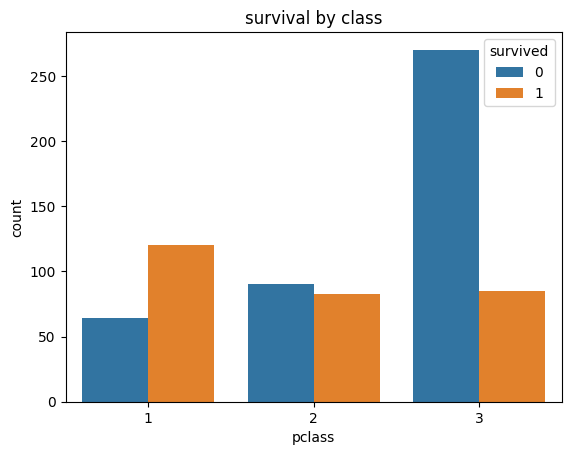

In [17]:
sns.countplot(x = "pclass" , hue = "survived" , data = df)
plt.title("survival by class")
plt.show()